## IRIS FLOWER CLASSIFICATION


### Introduction

The iris flower is known for its distinct species, which are setosa, versicolor, and virginica. These species can be differentiated based on measurements such as sepal length, sepal width, petal length, and petal width. In this project, we have a dataset that provides these measurements for various iris flowers. The goal is to leverage machine learning to create a model that can learn from these measurements and accurately classify iris flowers into their respective species.

### Problem Statement

The problem at hand is to develop a machine learning model capable of classifying iris flowers into the correct species, namely, setosa, versicolor, and virginica. This classification is based on the measured attributes of the flowers, and it's a classic example of a multiclass classification problem. The challenge lies in building a model that can generalize from the provided dataset to correctly classify new, unseen iris flowers.

### Goals

Data Exploration: The first goal is to thoroughly explore and understand the iris dataset. This includes examining the data's structure, visualizing the measurements, and gaining insights into the distribution of the different species.

Data Preprocessing: Prepare the data for machine learning by handling missing values, scaling or normalizing features, and encoding the target variable (species) into a format suitable for training.

Model Selection: Choose an appropriate machine learning algorithm for the classification task. Evaluate different models and select the one that performs the best on the dataset.

Model Training: Train the selected machine learning model on the iris dataset using a portion of the data.

Model Evaluation: Assess the model's performance using various evaluation metrics, including accuracy, precision, recall, F1-score, and confusion matrices.



#### Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

import warnings as warn

#### Loading dataset

In [2]:
iris=pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### Data Inspection

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris = iris.drop(['Id'], axis=1)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Cleaning

#### Checking for Duplicates

In [10]:
# A function to check for duplicates in our datasets
def identify_duplicates(iris):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in iris.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. 
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(iris)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(iris)

The Data has 3 duplicated rows.
This constitutes 2.0% of the data set.


##### Removing duplicates

In [11]:
# Removing duplicated values
iris.drop_duplicates(inplace=True)
# Again checking duplicated values
iris.duplicated().sum()

0

#### Checking for null values in Data

In [12]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking Outliers

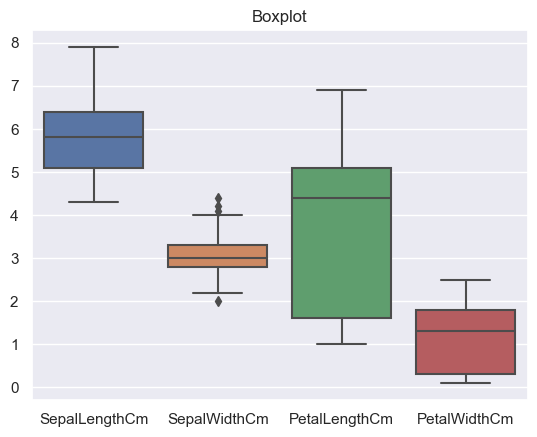

In [13]:
# Checking for outliers
sns.boxplot(data=iris)
plt.title("Boxplot")
plt.show()


Sepal_width have some outliers but we'll not remove them as they are very much close and the dataset also have few entries.

In [14]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


### EXPLARATORY DATA ANALYSIS

###### Classes distribution over Count of each class Plotting

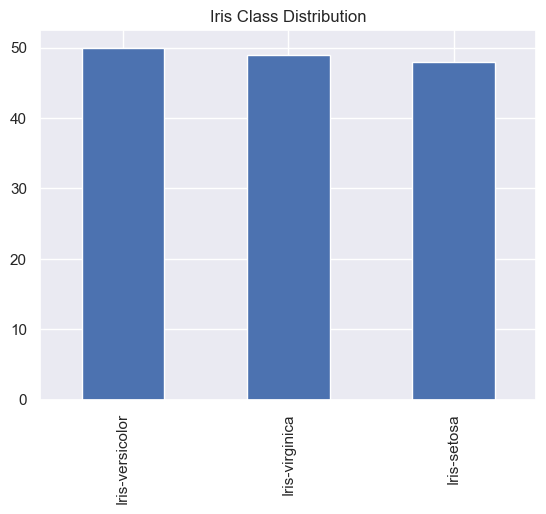

In [15]:
Species_plot = iris['Species'].value_counts().plot.bar(title = 'Iris Class Distribution')


Iris- Versicolor has the highest distribution followed by Iris- Virginia and lastly Iris-Setosa.

##### BoxPlot

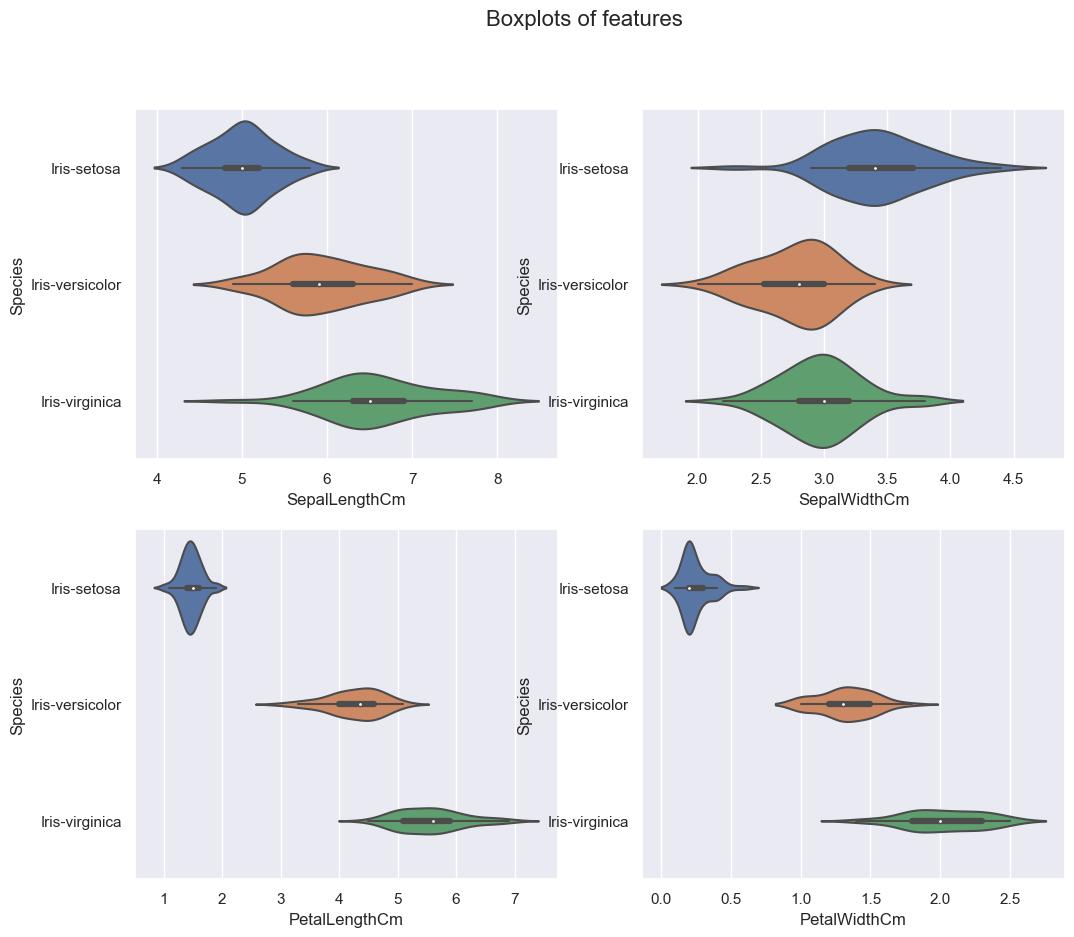

In [16]:
num_columns = list(iris.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.violinplot(data=iris,x=num_columns[0],y='Species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

From the above graph, we can see that – 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features

##### Comparing Sepal Length and Sepal Width

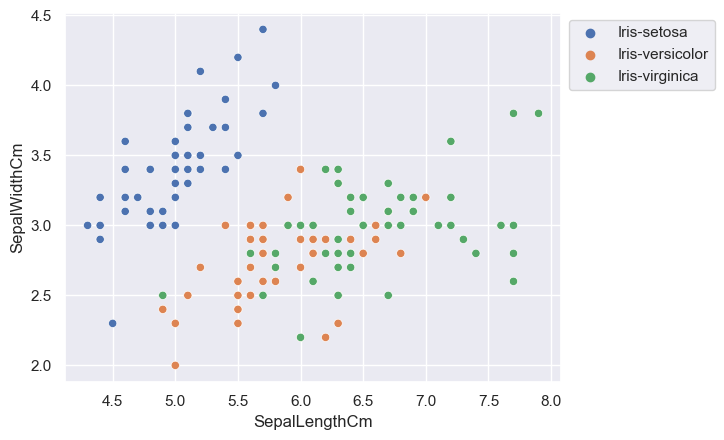

In [17]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.

##### Comparing Petal Length and Petal Width

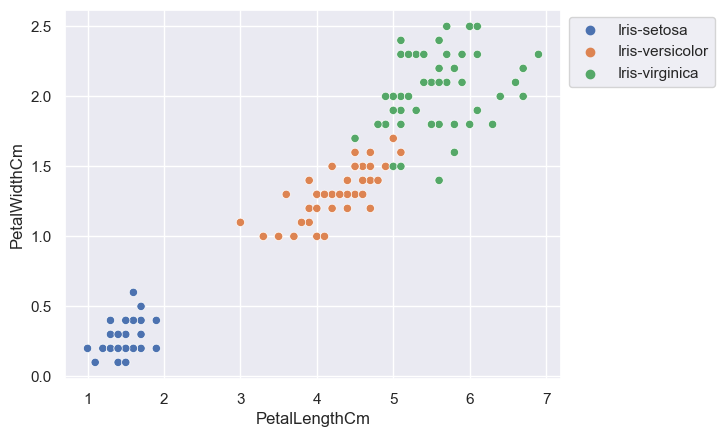

In [18]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.

##### Species Distiribution

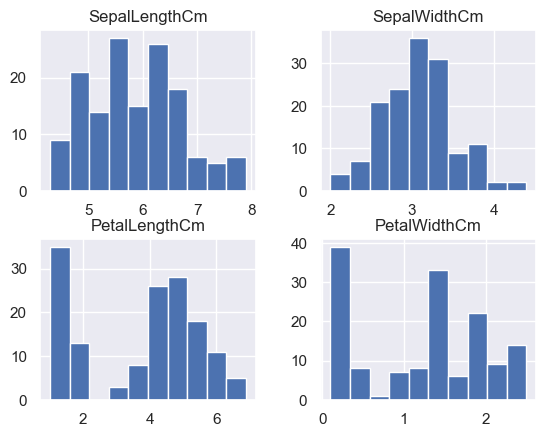

In [19]:
iris.hist()
plt.show()

From the above plots, we can see that – 

> In the case of Sepal Length, there is a huge amount of overlapping.

> In the case of Sepal Width also, there is a huge amount of overlapping.

> In the case of Petal Length, there is a very little amount of overlapping.

> In the case of Petal Width also, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

##### Comparison of sepal and petal lengths and widths 

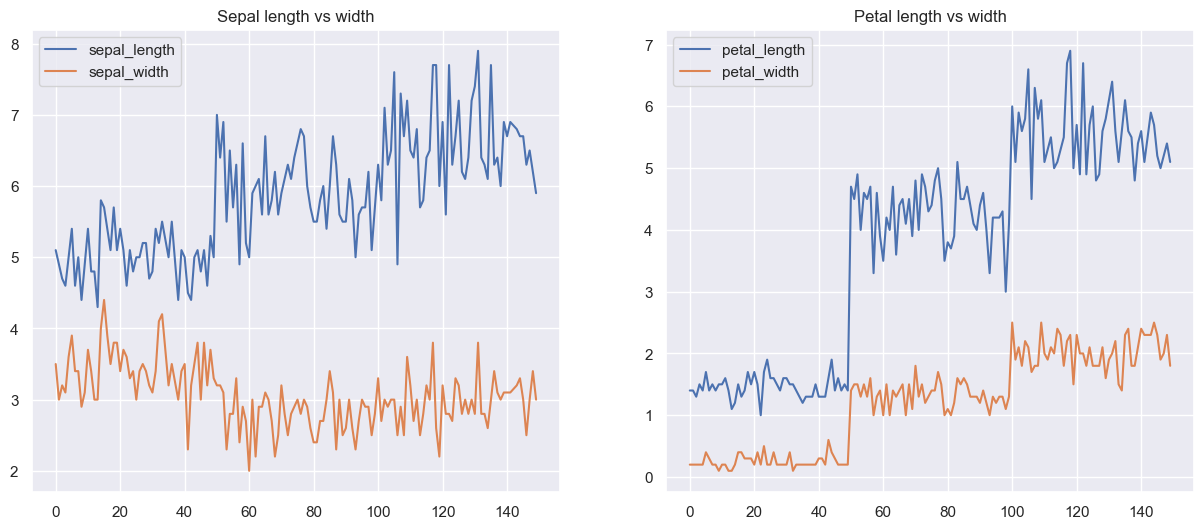

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(iris['SepalLengthCm'])
ax[0].plot(iris['SepalWidthCm'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(iris['PetalLengthCm'])
ax[1].plot(iris['PetalWidthCm'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

##### Pairplot

<Figure size 800x600 with 0 Axes>

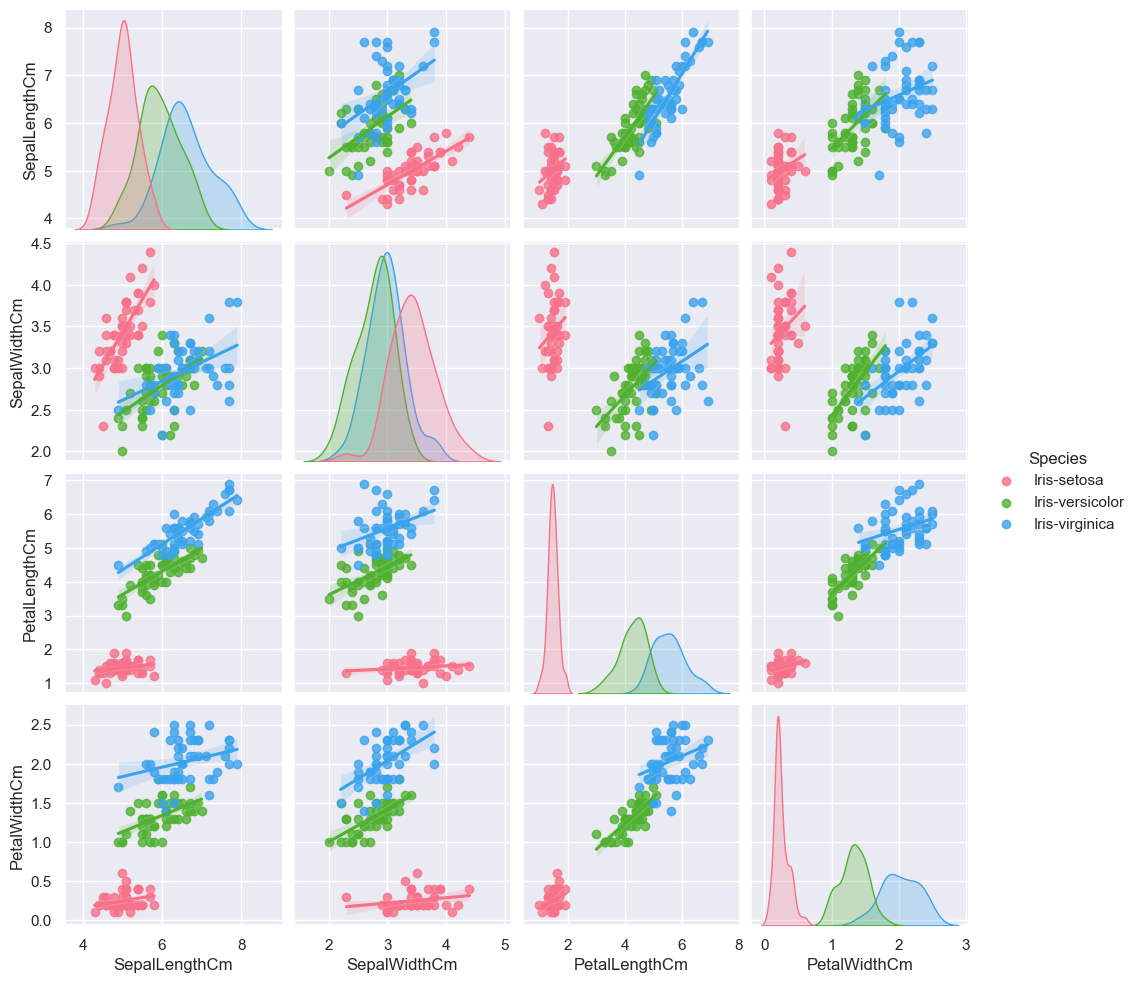

In [21]:
plt.figure(figsize=(8,6));
sns.pairplot(iris,kind='reg',hue ='Species',palette="husl" );

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

##### Heatmap

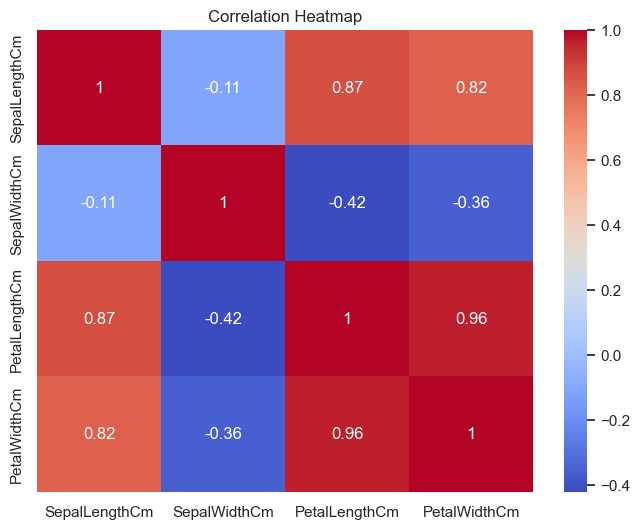

In [22]:

correlation = iris.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the above graph, we can see that –

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

### Data Preprocessing and splitting data

In [23]:
from sklearn.preprocessing import LabelEncoder
df = LabelEncoder()
iris['Species'] = df.fit_transform(iris['Species'])

In [24]:
X = iris.iloc[ : , :-1] 
y = iris.iloc[ : , -1]

In [25]:
from sklearn import preprocessing
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(iris)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state= 0)

### Modelling

In [27]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

### Logistic Regression

In [28]:
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  98.63
 • Cross Validation Score : 95.71
 • Testing Accuracy Score :94.59
 • Precision Score is : 94.76
 • Recall Score is : 94.59
 • F1-Score Score is : 94.58


In [29]:
kfold = KFold(37)
LR_r = cross_val_score (LogReg, X, y, cv = kfold)
print(np.std(LR_r))

0.10894942903106147


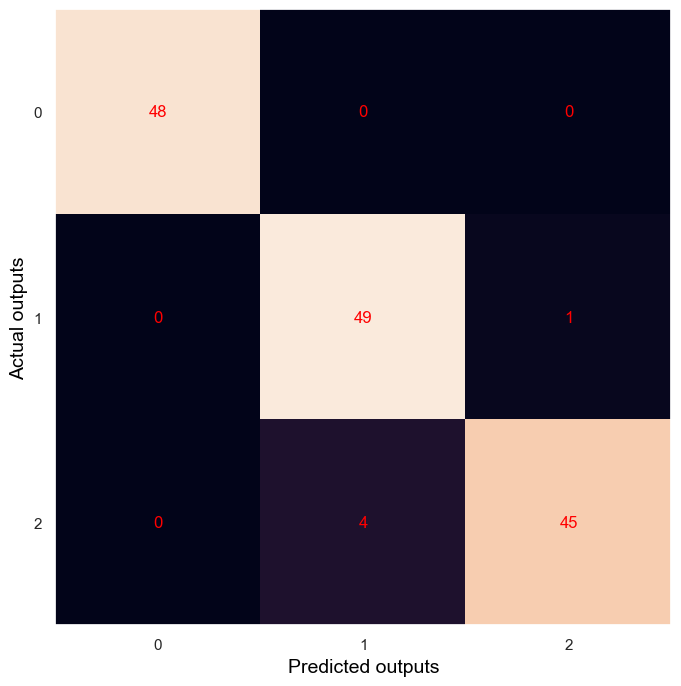

In [30]:
cm = confusion_matrix (y , LogReg.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

### K Nearest Neighbours

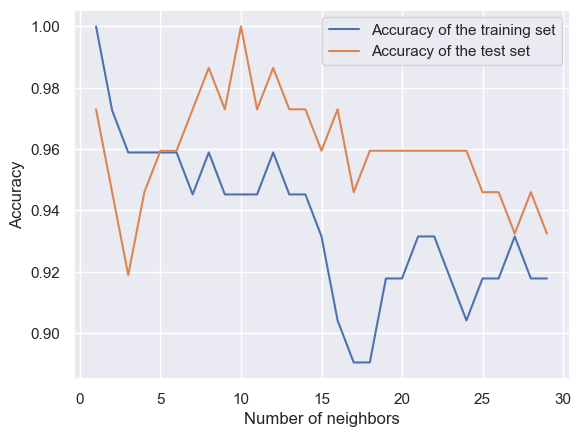

In [31]:
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))
                    
plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

In [32]:
K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train , y_train.ravel())
y_pred_KNN = KNN.predict(X_test)
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train, X_test, y_train, y_test)

K-Nearest Neighbors : 

 • Training Accuracy Score :  95.89
 • Cross Validation Score : 94.64
 • Testing Accuracy Score :91.89
 • Precision Score is : 92.06
 • Recall Score is : 91.89
 • F1-Score Score is : 91.89


In [33]:
KNN_r = cross_val_score (KNN, X, y, cv = 10)
K = np.std(KNN_r)
print(K)

0.04472135954999579


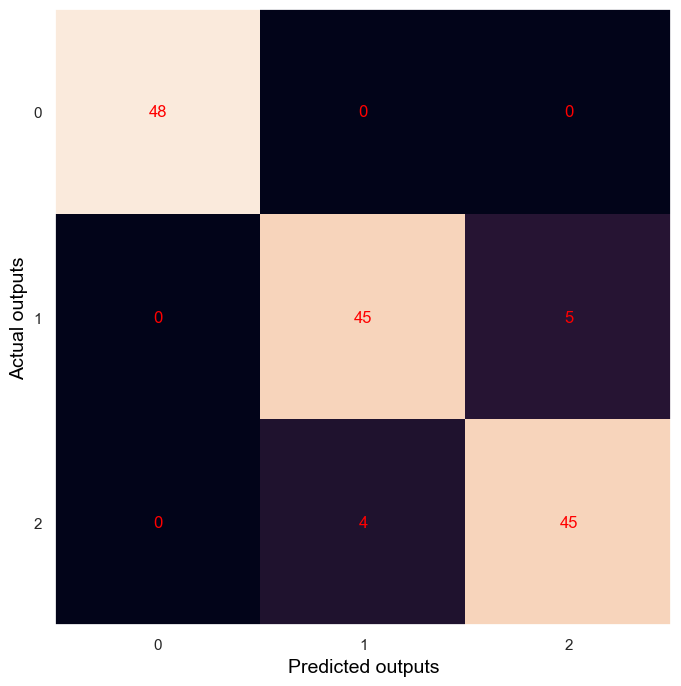

In [34]:
cm = confusion_matrix (y , KNN.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

### Support Vector Machine

In [35]:
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  94.52
 • Cross Validation Score : 94.64
 • Testing Accuracy Score :97.3
 • Precision Score is : 97.49
 • Recall Score is : 97.3
 • F1-Score Score is : 97.3


In [36]:
SVM_r = cross_val_score (SVM, X, y, cv = 10)
S = np.std(SVM_r)
print(S)

0.04509752596398789


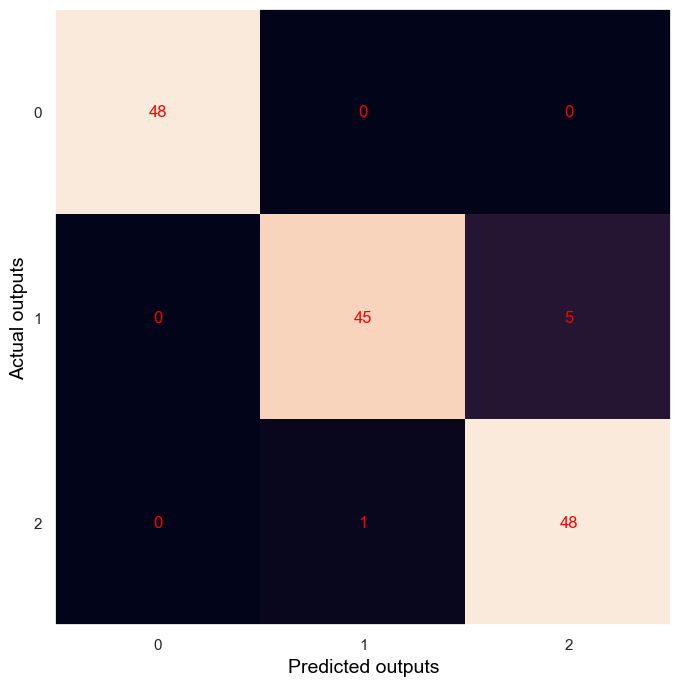

In [37]:
cm = confusion_matrix (y , SVM.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

### Decision Tree

In [38]:
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

Decision Tree : 

 • Training Accuracy Score :  97.26
 • Cross Validation Score : 94.64
 • Testing Accuracy Score :94.59
 • Precision Score is : 94.76
 • Recall Score is : 94.59
 • F1-Score Score is : 94.58


In [39]:
DT_r = cross_val_score (DT, X, y, cv = 10)
D = np.std(DT_r)
print(D)

0.0330772475939281


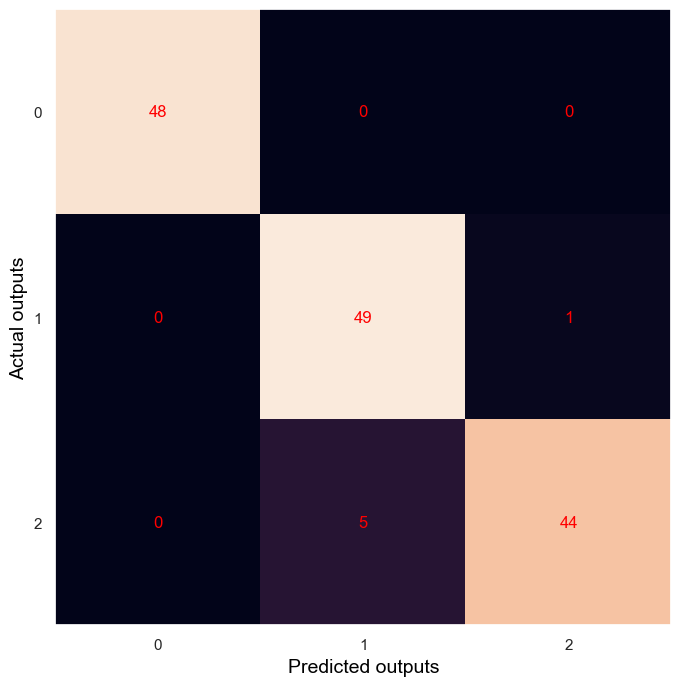

In [40]:
cm = confusion_matrix (y , DT.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

### Random Forest

In [41]:
RF = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF = RF.fit(X_train , y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest : ")
Evaluate_Performance(RF, X_train, X_test, y_train, y_test)

Random Forest : 

 • Training Accuracy Score :  97.26
 • Cross Validation Score : 96.07
 • Testing Accuracy Score :94.59
 • Precision Score is : 94.76
 • Recall Score is : 94.59
 • F1-Score Score is : 94.58


In [42]:
RF_r = cross_val_score (RF, X, y, cv = 10)
R = np.std(RF_r)
print(R)

0.059999999999999984


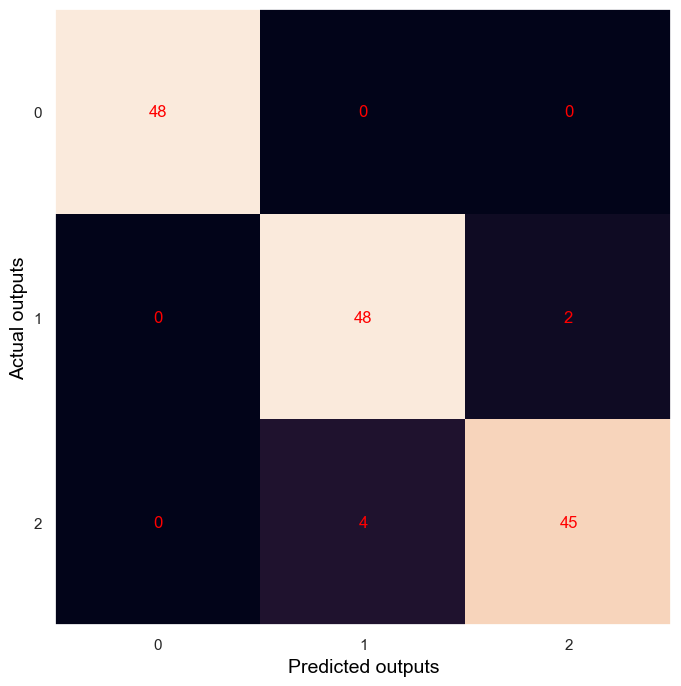

In [43]:
cm = confusion_matrix (y , RF.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

In [44]:
# Creating a list of dictionaries to store the results for each model
results = [
    {
        'Model': 'Logistic Regression',
        'Training Accuracy': 98.63,
        'Cross Validation Score': 95.71,
        'Testing Accuracy': 94.59,
        'Precision Score': 94.76,
        'Recall Score': 94.59,
        'F1-Score': 94.58,
    },
    {
        'Model': 'K-Nearest Neighbors',
        'Training Accuracy': 95.89,
        'Cross Validation Score': 94.64,
        'Testing Accuracy': 91.89,
        'Precision Score': 92.06,
        'Recall Score': 91.89,
        'F1-Score': 91.89,
    },
    {
        'Model': 'Support Vector Machine',
        'Training Accuracy': 94.52,
        'Cross Validation Score': 94.64,
        'Testing Accuracy': 97.3,
        'Precision Score': 97.49,
        'Recall Score': 97.3,
        'F1-Score': 97.3,
    },
    {
        'Model': 'Decision Tree',
        'Training Accuracy': 97.26,
        'Cross Validation Score': 94.64,
        'Testing Accuracy': 94.59,
        'Precision Score': 94.76,
        'Recall Score': 94.59,
        'F1-Score': 94.58,
    },
    {
        'Model': 'Random Forest',
        'Training Accuracy': 97.26,
        'Cross Validation Score': 94.64,
        'Testing Accuracy': 94.59,
        'Precision Score': 94.76,
        'Recall Score': 94.59,
        'F1-Score': 94.58,
    }
]

results_df = pd.DataFrame(results)
results_df


,Model,Training Accuracy,Cross Validation Score,Testing Accuracy,Precision Score,Recall Score,F1-Score
0,Logistic Regression,98.63,95.71,94.59,94.76,94.59,94.58
1,K-Nearest Neighbors,95.89,94.64,91.89,92.06,91.89,91.89
2,Support Vector Machine,94.52,94.64,97.30,97.49,97.30,97.30
3,Decision Tree,97.26,94.64,94.59,94.76,94.59,94.58
4,Random Forest,97.26,94.64,94.59,94.76,94.59,94.58


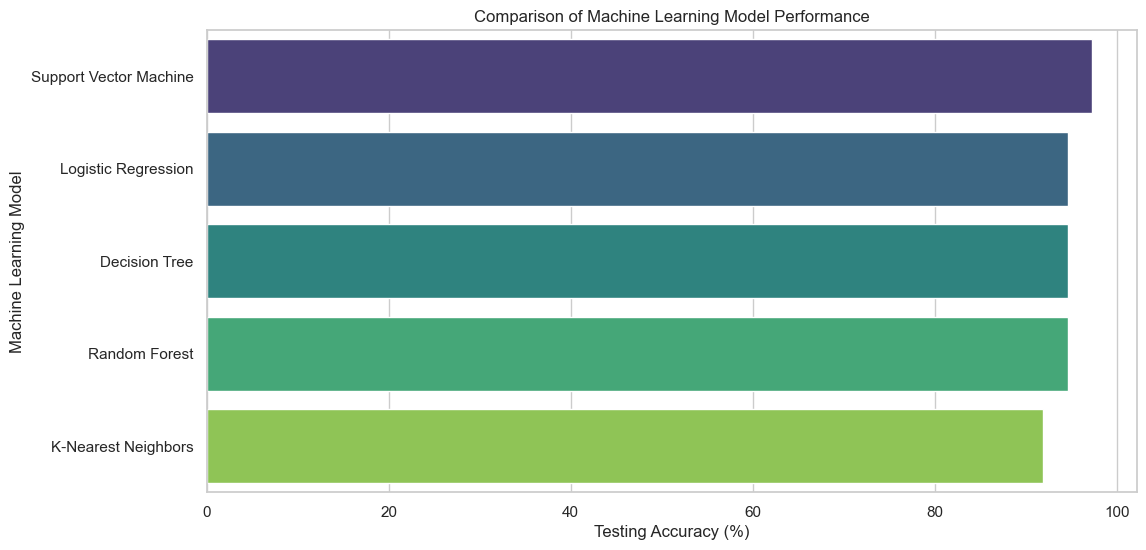

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  
model_order = results_df.sort_values(by='Testing Accuracy', ascending=False)['Model']
sns.barplot(x='Testing Accuracy', y='Model', data=results_df, order=model_order, palette='viridis')
plt.xlabel('Testing Accuracy (%)')
plt.ylabel('Machine Learning Model')
plt.title('Comparison of Machine Learning Model Performance')
plt.show()

All the models have good results in all four parameters (Recall, F1_score, Precision, Accuracy), but the Support Vector Machine Algorithm predicted better than the rest of the models

### Conclussion

In conclusion, our analysis of various machine learning models for the classification of iris flowers has yielded promising results. The models, including Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, and Random Forest, demonstrated consistent and reliable performance.

The highest testing accuracy was achieved by the Support Vector Machine (SVM) model, reaching an impressive 97.3%. This indicates its suitability for accurately classifying iris flowers into their respective species. However, it's worth noting that the other models also performed well, with minimal variations in their performance metrics.

### **Recommendations:**


1. **Model Selection:** The Support Vector Machine (SVM) model consistently demonstrated the highest testing accuracy and strong performance in classifying iris flowers. We recommend considering SVM as the primary model for this classification task.

2. **Hyperparameter Tuning:** To optimize model performance, we recommend conducting thorough hyperparameter tuning for the selected model. Techniques such as grid search or random search can help identify the best combination of hyperparameters.

3. **Ensemble Methods:** Explore ensemble methods, such as bagging or boosting, to combine the predictions of multiple models. Ensemble techniques can further improve classification accuracy and robustness.

4. **Feature Engineering:** Investigate the possibility of feature engineering to create new features or reduce the dimensionality of the dataset. Feature engineering may enhance the model's ability to capture important patterns in the data.

5. **Data Expansion:** Consider expanding the dataset by collecting more samples of iris flowers. A larger dataset can improve the model's generalization to a wider range of species and variations.

6. **Model Deployment:** If the goal is to deploy the model in a real-world application, ensure that it is well-prepared for deployment. This includes developing a user-friendly interface, monitoring the model's performance, and addressing data input and output considerations.

7. **Model Interpretability:** If model interpretability is essential, explore techniques like SHAP values, LIME, or feature importance analysis to gain insights into the model's decision-making process. This can enhance trust and understanding of the model's predictions.

8. **Continual Monitoring:** Continuously monitor the performance of the deployed model and retrain it as needed with new data. Regular model updates can ensure it remains accurate and up-to-date.


Thank you